# Download the example data from [here](https://drive.google.com/file/d/1lrFcbhEVTfcVyL8pxSE36QT0Fl72l5gT) and unzip it
# Then you can run the notebook assuming the file paths are the same

In [8]:
import umndet.ground.helpers as gh
import gzip
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

## Loading in the data

In [9]:
hafx_data = []
health_data = []

data_folder = 'nominal'
for fn in sorted(os.listdir(data_folder)):
    full_fn = f'{data_folder}/{fn}'
    if fn.startswith('detector-health'):
        health_data += gh.read_det_health(full_fn, gzip.open)
    elif fn.startswith('hafx-time-slice'):
        hafx_data += gh.read_hafx_sci(full_fn, gzip.open)

## Example plotting some pieces of the health data

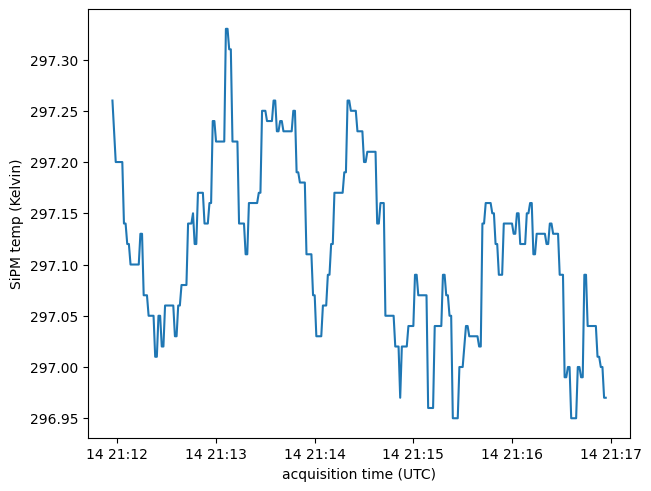

In [15]:
sipm_temps = [hd.c1.sipm_temp / 100 for hd in health_data]
times = [
    datetime.datetime.fromtimestamp(hd.timestamp, tz=datetime.timezone.utc)
    for hd in health_data
]
fig, ax = plt.subplots(layout='constrained')
ax.plot(times, sipm_temps)
ax.set(xlabel='acquisition time (UTC)', ylabel='SiPM temp (Kelvin)')
plt.show()

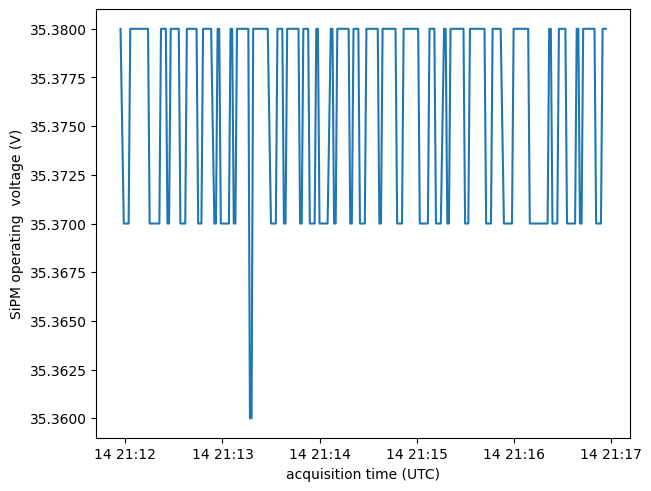

In [11]:
sipm_volts = [hd.c1.sipm_operating_voltage / 100 for hd in health_data]
fig, ax = plt.subplots(layout='constrained')
ax.plot(times, sipm_volts)
ax.set(xlabel='acquisition time (UTC)', ylabel='SiPM operating  voltage (V)')
plt.show()

# Look at a spectrogram over time of counts data acquired over ~5 minutes

In [12]:
counts_spectrogram = np.array([
    hd.histogram for hd in hafx_data
])

In [13]:
recent = datetime.datetime.fromtimestamp(hafx_data[0].time_anchor)
times = [recent]
idx = 1
for hd in hafx_data[1:]:
    if hd.time_anchor != 0:
        recent = datetime.datetime.fromtimestamp(hd.time_anchor)
    times.append(recent + datetime.timedelta(seconds=((idx % 32) / 32)))
    idx += 1

# "time bins" are 1 larger than the # of histograms we get
times.append(times[-1] + datetime.timedelta(seconds=1/32))
times = np.array([np.datetime64(t) for t in times])

[Text(0.5, 0, 'Time (local)'),
 Text(0, 0.5, 'Mapped ADC bin'),
 Text(0.5, 1.0, 'Counts spectrogram (Bi207 source added at ~16:12)')]

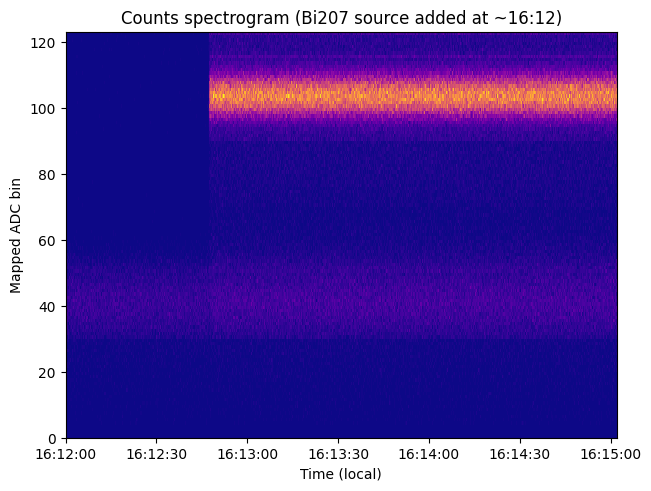

In [14]:
fig, ax = plt.subplots(layout='constrained')
weird_adc_bins = np.arange(counts_spectrogram.shape[1] + 1)
ax.pcolormesh(
    times, 
    weird_adc_bins,
    counts_spectrogram.T,
    cmap='plasma'
)

ax.set(
    xlabel='Time (local)',
    ylabel='Mapped ADC bin',
    title='Counts spectrogram (Bi207 source added at ~16:12)'
)

### You can clearly see when I introduced the Bi207 source in the data. Cool!